Exploratory Data Analysis For Purchase Behavior

The goal is to understand the relationships of gender, income, and the influence of age have on driving whether or not an individual will make a purchase. Understanding the factors that influence purchasing behavior is crucial for businesses looking to optimize their marketing efforts and improve sales. Demographic attributes like age, gender, and annual income are significant predictors of consumer behavior. By accurately predicting the likelihood of a purchase, businesses can allocate resources more efficiently, create personalized marketing strategies, and ultimately increase their revenue.


Null Hypothesis:
Age, gender, and annual income have no significant effect on the likelihood of an individual making a purchase.

Alternative Hypothesis:
Age, gender, and annual income have a significant effect on the likelihood of an individual making a purchase.

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('cleaned_cust_data.csv')

In [8]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1388 non-null   int64  
 1   Gender              1388 non-null   int64  
 2   AnnualIncome        1388 non-null   float64
 3   NumberOfPurchases   1388 non-null   int64  
 4   ProductCategory     1388 non-null   int64  
 5   TimeSpentOnWebsite  1388 non-null   float64
 6   LoyaltyProgram      1388 non-null   int64  
 7   DiscountsAvailed    1388 non-null   int64  
 8   PurchaseStatus      1388 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 97.7 KB


Since our main focus here is age, gender and annual income I am going to start by taking a look into annual income.

In [11]:
df.AnnualIncome.min(), df.AnnualIncome.max()

(20001.5125181976, 149785.17648108344)

In [12]:
df.AnnualIncome.value_counts(bins=10).sort_values(ascending=True)

(32979.879, 45958.245]      120
(84893.344, 97871.711]      130
(136806.81, 149785.176]     135
(123828.444, 136806.81]     136
(58936.612, 71914.978]      140
(97871.711, 110850.077]     141
(71914.978, 84893.344]      142
(45958.245, 58936.612]      145
(110850.077, 123828.444]    148
(19871.728, 32979.879]      151
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

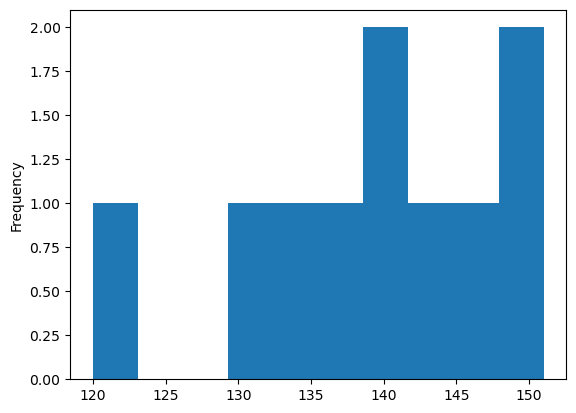

In [13]:
df.AnnualIncome.value_counts(bins=10).sort_values(ascending=True).plot(kind='hist')

<Axes: xlabel='AnnualIncome', ylabel='Count'>

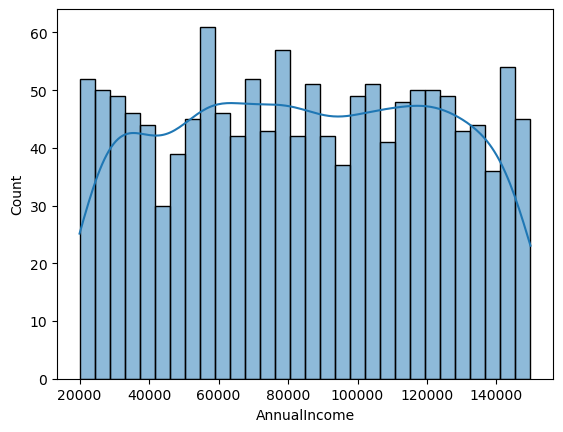

In [14]:
sns.histplot(data=df, x='AnnualIncome', kde=True, bins=30)

FIRST LOOK INTO AGE

In [16]:
df.Age.min(), df.Age.max()

(18, 70)

In [17]:
df.Age.value_counts(bins=[18, 25, 35, 45, 55, 65, 70]).sort_values(ascending=True)

(65.0, 70.0]      145
(17.999, 25.0]    227
(25.0, 35.0]      236
(55.0, 65.0]      237
(45.0, 55.0]      269
(35.0, 45.0]      274
Name: count, dtype: int64

<Axes: >

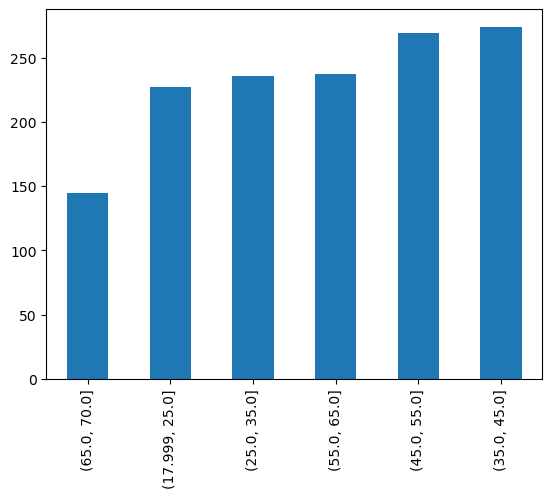

In [18]:
df.Age.value_counts(bins=[18, 25, 35, 45, 55, 65, 70]).sort_values(ascending=True).plot(kind='bar')

Looks like our largest Age demographic for data is between the ages of 35-45

FIRST LOOK INTO GENDER

In [21]:
df.Gender.value_counts()

Gender
1    696
0    692
Name: count, dtype: int64

RELATIONSHIP BETWEEN AGE & GENDER

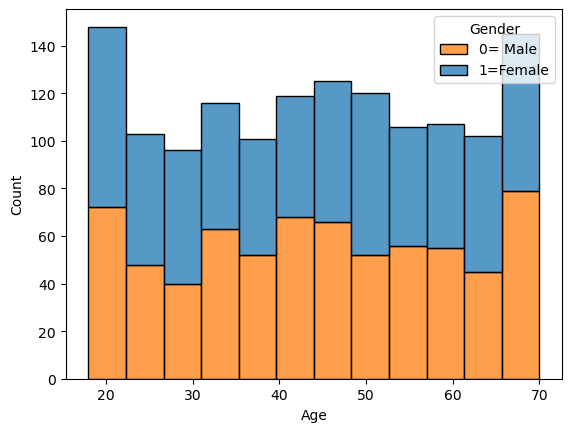

In [23]:
sns.histplot(data=df, x="Age", hue="Gender",  multiple="stack")
plt.legend(title="Gender", loc="upper right", labels=["0= Male", "1=Female"])
plt.show()

GETTING AN OVERVIEW

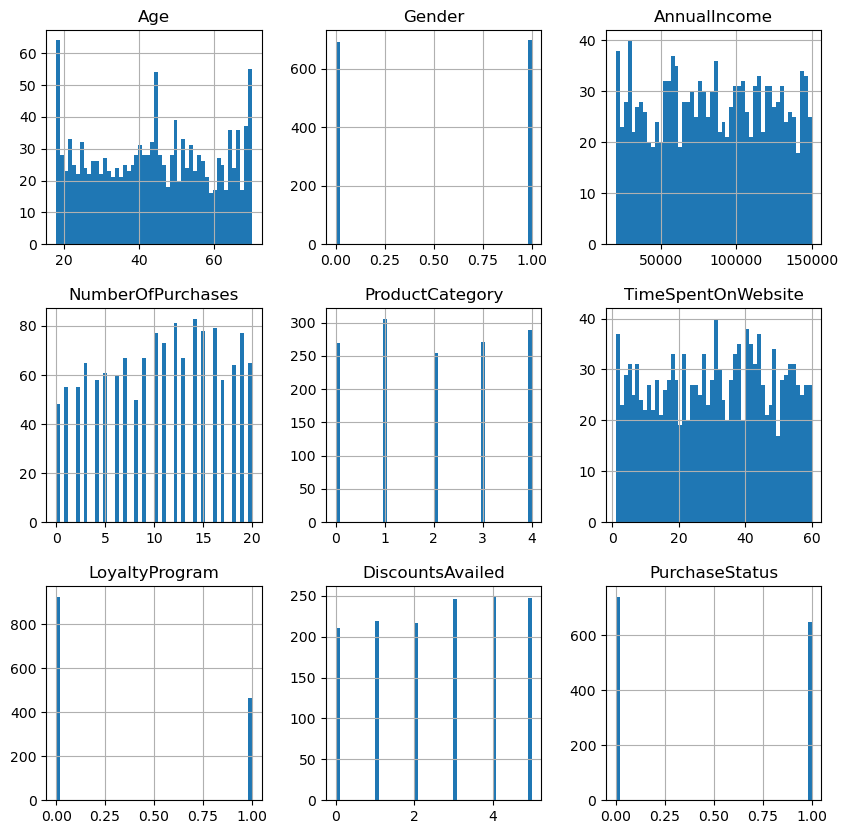

In [25]:
df.hist(figsize=(10,10),bins=50)
plt.show()

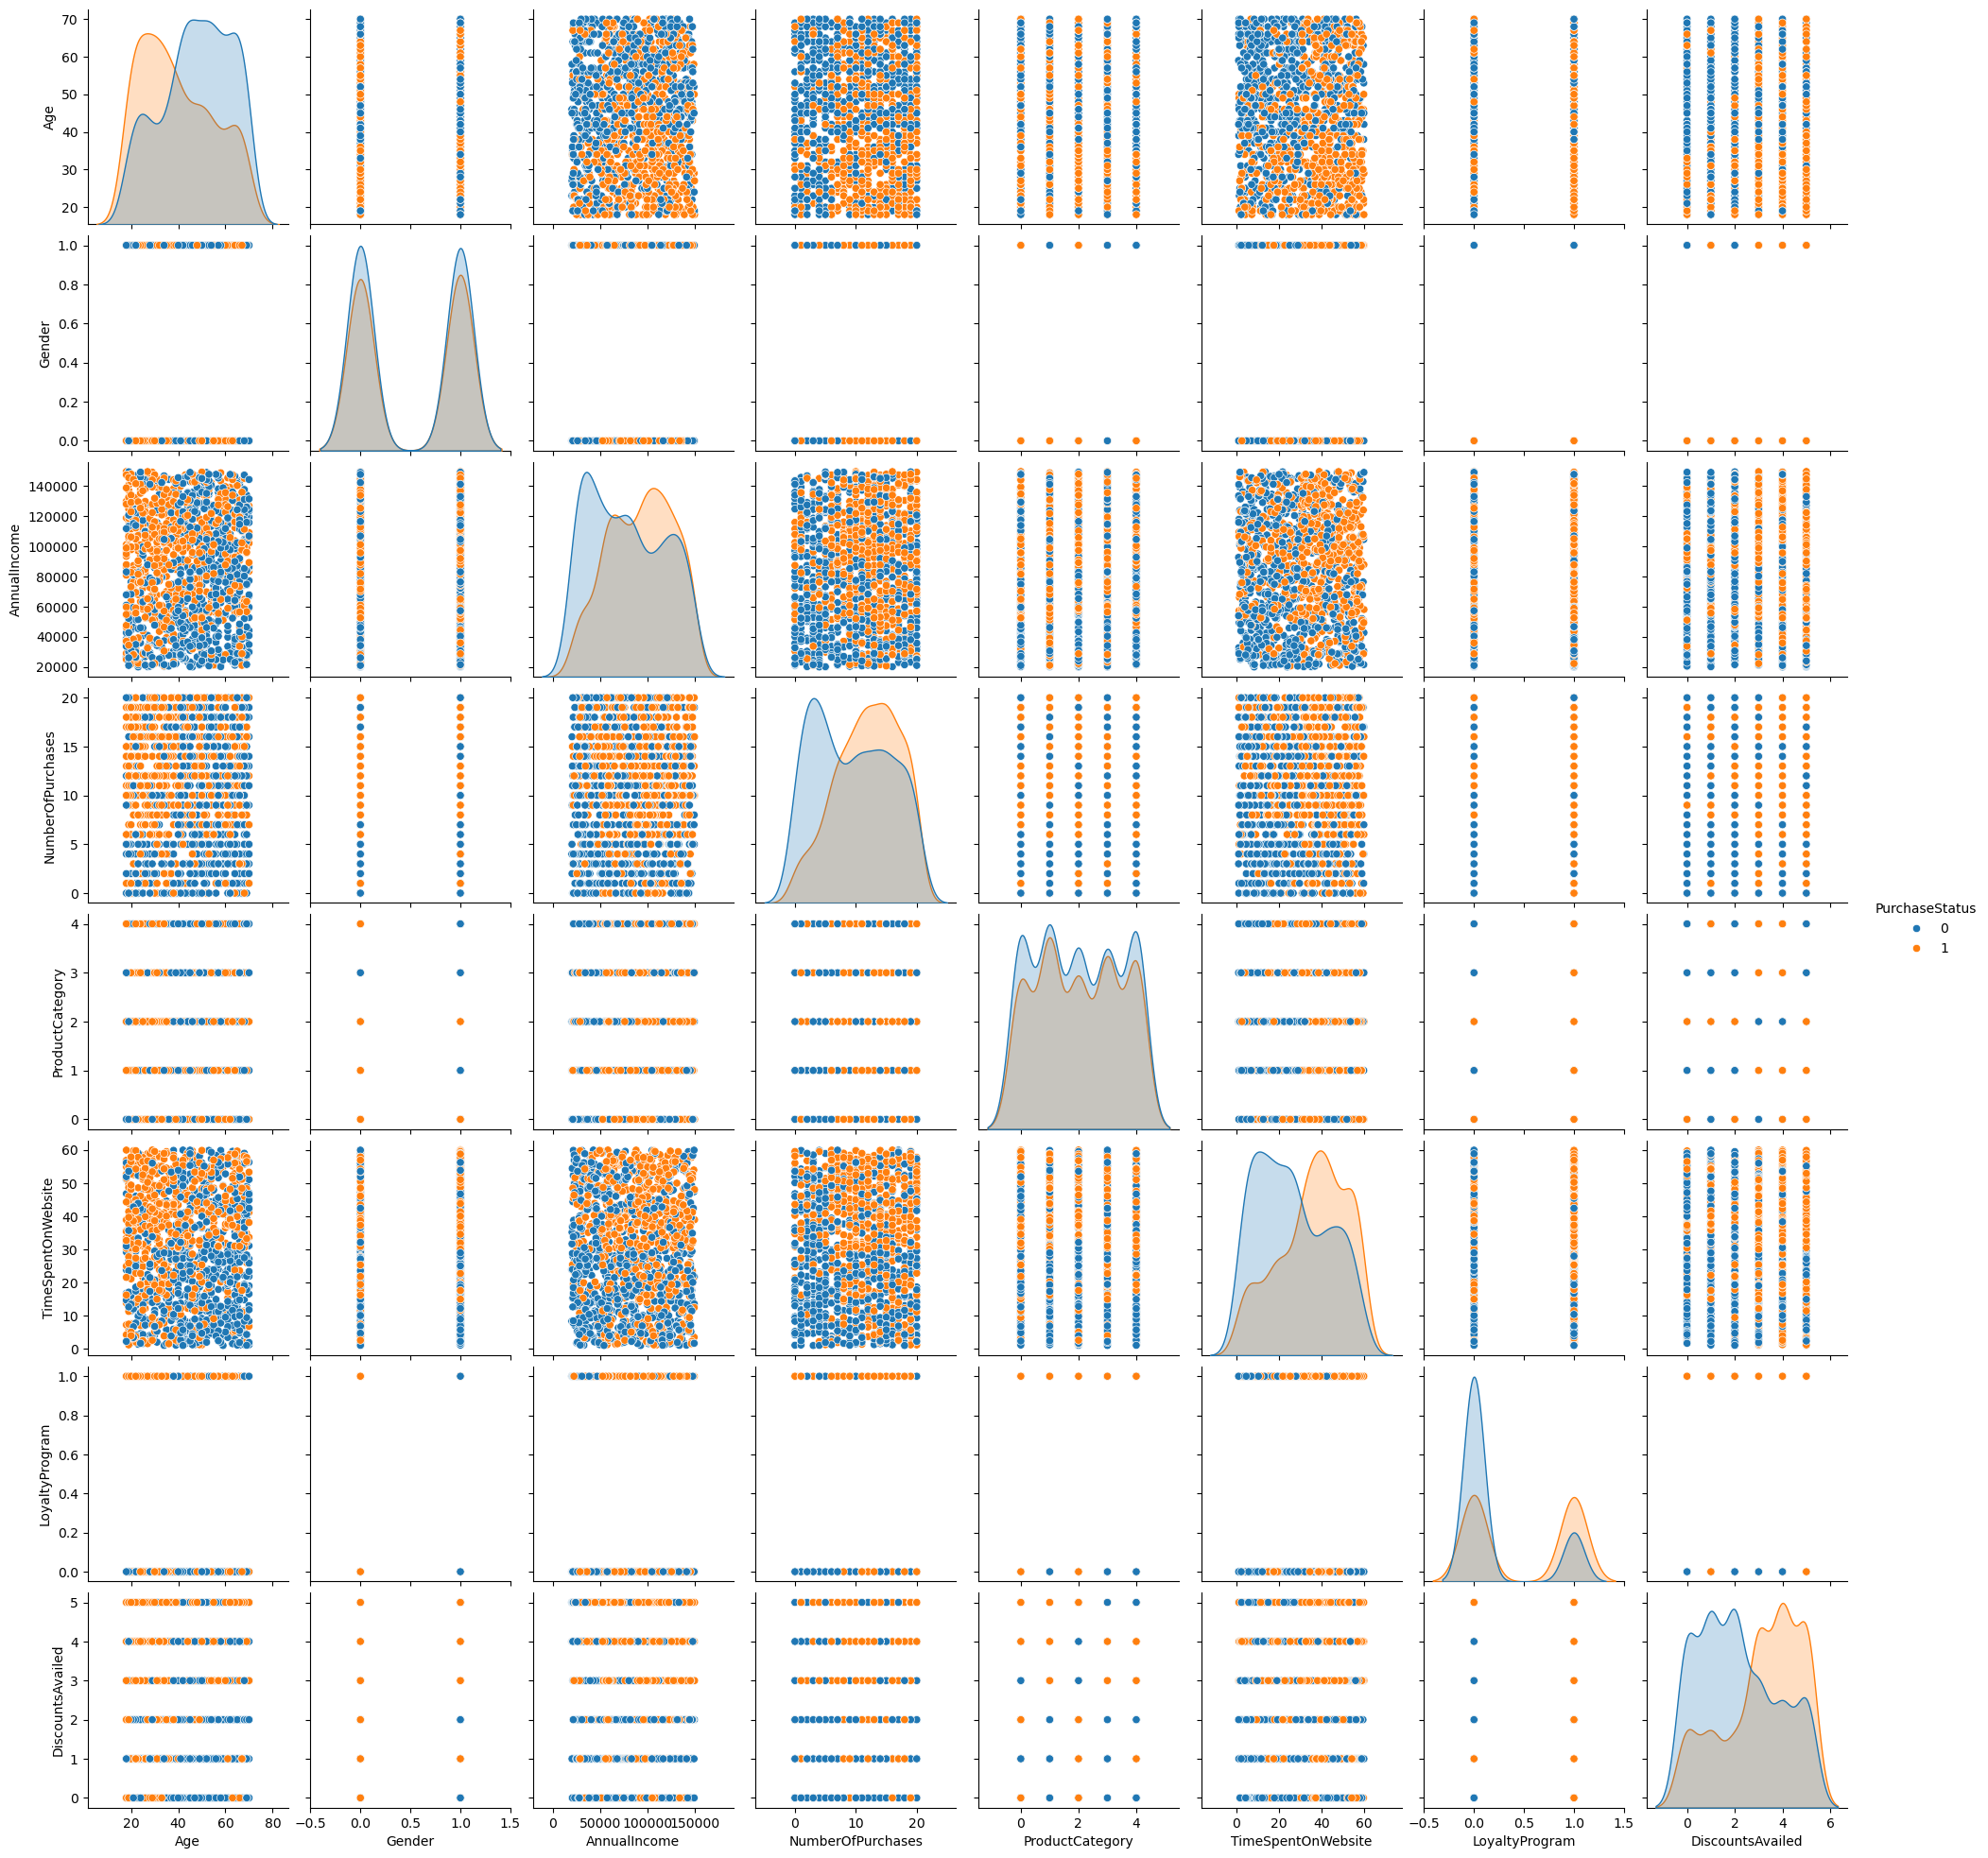

In [26]:
sns.pairplot(df, hue='PurchaseStatus')
plt.show()

In order to really understand our marketing needs we will need to understand the relationship of purchases made by gender.

PURCHASE RATIO BY GENDER. 1=Purchase 0=No Purchase

In [89]:
purchases = df[df['PurchaseStatus'] == 1].groupby('Gender')['PurchaseStatus'].count()
print(purchases)

Gender
0    320
1    328
Name: PurchaseStatus, dtype: int64


REMINDER 0=Male 1=Female

In [93]:
no_purchase = df[df['PurchaseStatus'] != 1].groupby('Gender')['PurchaseStatus'].count()
print(no_purchase)

Gender
0    372
1    368
Name: PurchaseStatus, dtype: int64


Looks like on both ends 1 (Females) tend to purchase more.

Text(0.5, 1.0, 'Purchase Ratio By Gender')

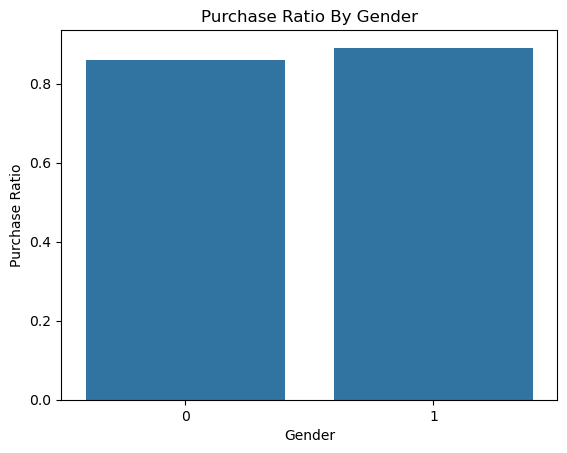

In [61]:
gen_ratio = purchases / no_purchase
gen_ratio = gen_ratio.sort_values().reset_index()
gen_ratio.columns = ['Gender','Purchase Ratio']

fig, axes = plt.subplots(1)
ax = sns.barplot(data = dist, x = 'Gender', y = 'Purchase Ratio')
ax.set_title('Purchase Ratio By Gender')

PURCHASE RATIO BY AGE

In [97]:
purchases_age = df[df['PurchaseStatus'] == 1].groupby('Age')['PurchaseStatus'].count()
print(purchases_age)

Age
18    23
19    19
20    20
21    16
22    21
23    13
24    15
25    18
26    15
27    12
28    16
29    22
30    12
31    19
32    20
33    11
34    16
35    14
36    14
37    11
38    17
39    17
40    13
41    10
42     6
43    13
44     8
45     6
46    12
47    12
48     6
49    10
50    18
51     7
52    12
53     6
54    13
55    11
56     6
57     6
58     6
59     4
60     9
61     9
62     6
63     8
64    12
65     8
66    13
67    10
68    10
69    10
70     7
Name: PurchaseStatus, dtype: int64


In [85]:
no_purchase_age = df[df['PurchaseStatus'] != 1].groupby('Age')['PurchaseStatus'].count()
print(no_purchase_age)

Age
18    10
19    12
20     8
21     7
22    12
23    12
24     7
25    14
26     9
27    10
28    10
29     4
30    10
31     8
32     3
33    10
34     8
35     7
36    11
37    12
38     8
39    11
40    18
41    18
42    22
43    19
44    12
45    28
46    16
47    13
48    12
49    18
50    21
51    13
52    21
53    18
54    18
55    12
56    22
57    20
58    15
59    12
60     8
61    18
62    19
63     9
64    24
65    16
66    23
67     7
68    27
69    18
70    20
Name: PurchaseStatus, dtype: int64


Text(0.5, 1.0, 'Purchases By Age')

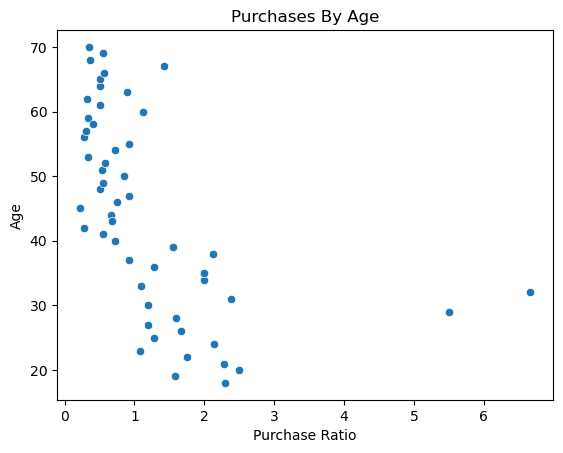

In [105]:
age_ratio = purchases_age / no_purchase_age
age_ratio = age_ratio.sort_values().reset_index()
age_ratio.columns = ['Age','Purchase Ratio']

fig, axes = plt.subplots(1)
ax = sns.scatterplot(data = age_ratio, x = 'Purchase Ratio', y = 'Age')
ax.set_title('Purchases By Age')

This is showing that the most purchases seem to be made by the 40 and younger age demographic.

PURCHASE RATIO vs. ANNUAL INCOME

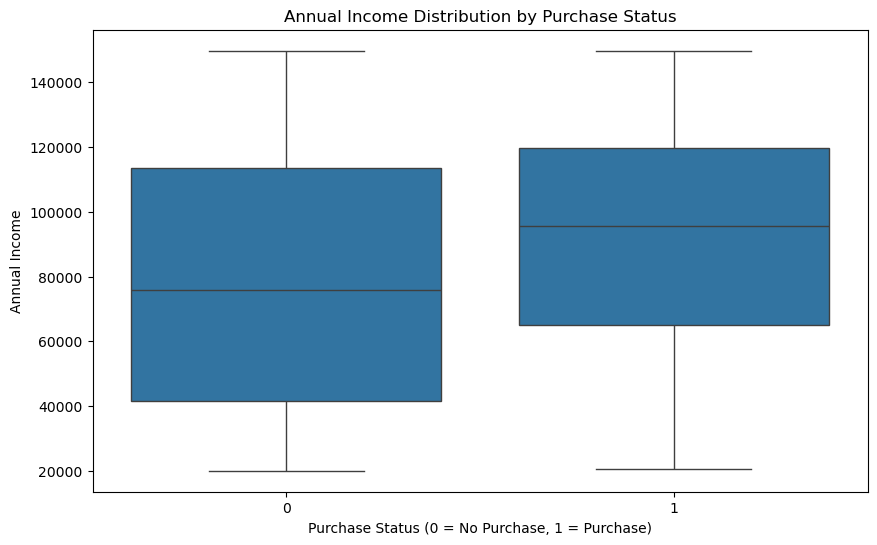

In [148]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PurchaseStatus', y='AnnualIncome')
plt.title('Annual Income Distribution by Purchase Status')
plt.xlabel('Purchase Status (0 = No Purchase, 1 = Purchase)')
plt.ylabel('Annual Income')
plt.show()

So from this we are seeing that the majority of purchases that where made was with a median income of around $90,000 a year. This would be our guranteed audience.